In [1]:
# import the packages
import numpy as np
import pandas as pd
import category_encoders as ce
from matplotlib import pyplot as plt
import time
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [2]:
data=pd.read_csv('data_desafio_seguros.csv')
df=data

In [3]:
df.describe()

,row_id,1,4,7,10,12,15,17,20
count,900.000000,900.000000,900.000000,900.000000,900.00000,900.000000,900.000000,900.000000,900.000000
mean,501.683333,21.093333,3276.157778,2.975556,2.85000,35.567778,1.397778,1.147778,1.297778
std,288.353781,12.082133,2777.158770,1.115899,1.09542,11.398967,0.559671,0.355077,0.457536
min,0.000000,4.000000,250.000000,1.000000,1.00000,19.000000,1.000000,1.000000,1.000000
25%,253.750000,12.000000,1382.000000,2.000000,2.00000,27.000000,1.000000,1.000000,1.000000
50%,504.500000,18.000000,2328.000000,3.000000,3.00000,33.000000,1.000000,1.000000,1.000000
75%,750.500000,24.000000,3994.000000,4.000000,4.00000,42.000000,2.000000,1.000000,2.000000
max,999.000000,72.000000,18424.000000,4.000000,4.00000,75.000000,4.000000,2.000000,2.000000


In [4]:
#1 los datos A11 A12 & A13 son ordinales, y el dato A14 debería ser binarizado, en fin mejor los hacemos dummies
ccorriente= df['0'].values
df2=pd.get_dummies(ccorriente)
#Lo agregamos a una nuevo dataframe
#df2 = pd.Series(df['row_id'])
#df2= pd.concat([df2,dcc],axis=1)

In [5]:
#2 Duración en meses
dfnorm3 = (df['1'] - df['1'].mean()) / (df['1'].max() - df['1'].min())
df2['duracion']=dfnorm3

In [6]:
#3 Historia Crediticia
#ha tomado créditos?
htc=[]
for row in ccorriente:
    if row == 'A30':
        ahc.append(1)
    else:
        htc.append(0)
df2['tomo creditos?']=htc

##Datos ordinales de historia crediticia
labels3= {'A31': 4, 'A32': 3.9, 'A33':2, 'A34':0, 'A30':0.1}
df.replace(labels3, inplace=True)
df2['Historia Crediticia']= (df['2'] - df['2'].mean()) / (df['2'].max() - df['2'].min())

In [7]:
#4 Proposito del credito, dummies
#MUCHAS DIMENSIONES!!!
purdum=pd.get_dummies(df['3'])
df2= pd.concat([df2,purdum],axis=1)

In [8]:
#5 monto del credito, normalizado
df2['monto']=(df['4'] - df['4'].mean()) / (df['4'].max() - df['4'].min())

In [9]:
#6 Ahorros de la cuenta
#tiene ahorros?
ahc=[]
for row in ccorriente:
    if row == 'A65':
        ahc.append(1)
    else:
        ahc.append(0)
df2['tiene ahorros?']=ahc

##Datos ordinales de ahorro
labels6= {'A61': 1, 'A62': 2, 'A63':3, 'A64':4, 'A65':0.1}
df.replace(labels6, inplace=True)
df.head()
#incluimos la nueva variable ordinal en el nuevo set de datos
df2['Ahorro']= (df['5'] - df['5'].mean()) / (df['5'].max() - df['5'].min())

In [10]:
#7 Tiempo en el empleo actual
labels6= {'A71': 0, 'A72': 0.5, 'A73':2.5, 'A74':5.5, 'A75':7}
df.replace(labels6, inplace=True)
df.head()
#incluimos la nueva variable ordinal en el nuevo set de datos
df2['tiempo de empleo']= df['6'].values

In [11]:
#8 tasa a plazo en porcentaje de la renta disponible
df2['tasa']=df['7']

In [12]:
#9 Estatus, dummies
estdum=pd.get_dummies(df['8'])
df2= pd.concat([df2,estdum],axis=1)

In [13]:
#10 Deudores y Garantes
labels10= {'A101': 3, 'A102': 2, 'A103':1}
df.replace(labels10, inplace=True)
df.head()
#incluimos la nueva variable ordinal en el nuevo set de datos
df2['deudores']= df['9'].values

In [14]:
#11 Tiempo de residencia, debe ser normalizado
dfnorm = (df['10'] - df['10'].mean()) / (df['10'].max() - df['10'].min())
df2['tiempo de residencia']=dfnorm

In [15]:
#12 Posesiones a su nombre
labels10= {'A121': 4, 'A122': 2, 'A123':3, 'A124':1}
df.replace(labels10, inplace=True)
df.head()
#incluimos la nueva variable ordinal en el nuevo set de datos
df2['Posesiones']= df['11'].values

In [16]:
#13 Edad en años, se necesita normalizar
dfnorm2 = (df['12'] - df['10'].mean()) / (df['12'].max() - df['12'].min())
df2['tiempo de residencia']=dfnorm2

In [17]:
#14 Otros pagos pendientes en cuotas
labels11= {'A141': 0.1, 'A142': 0.09, 'A143':3}
df.replace(labels11, inplace=True)
df.head()
#incluimos la nueva variable ordinal en el nuevo set de datos
df2['Pagos pendientes']= df['13'].values

In [18]:
#15 Forma en la que vive, Dummies
livdum=pd.get_dummies(df['14'])
df2= pd.concat([df2,livdum],axis=1)

In [19]:
#16 Número de créditos existentes en este banco actualmente
df2['N creditos']= (df['15'] - df['15'].mean()) / (df['15'].max() - df['15'].min())

In [20]:
#17, Tipo de trabajo es, ordinal
#Asignamos un orden con un diccionario al atributo 17 (16)
labels17= {'A171': 1, 'A172': 2, 'A173': 3, 'A174': 4 }
df.replace(labels17, inplace=True)
df.head()
#incluimos la nueva variable ordinal en el nuevo set de datos
df2['tipo de trabajo']= (df['16'] - df['16'].mean()) / (df['16'].max() - df['16'].min())

In [21]:
#18 Número de personas por las cuales es responsable de dar mantenimiento 
df2['Responsabilidades']=(df['17'] - df['17'].mean()) / (df['17'].max() - df['17'].min())

In [22]:
#19  Si tiene teléfono, OneHot
phodum=pd.get_dummies(df['18'], drop_first=True)
df2= pd.concat([df2,phodum],axis=1)

In [23]:
#20 Si es un trabajador extranjero, Onehot
wordum=pd.get_dummies(df['19'], drop_first=True)
df2= pd.concat([df2,wordum],axis=1)

In [24]:
 #21 Clasificación actual
#peso extra
labels21= {1: 10, 2:-10}
df['20'].replace(labels21, inplace=True)
df2['Clasificación']= df['20']

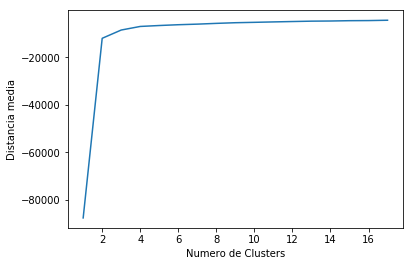

In [25]:
start = time.time()
dfc = pd.DataFrame(df2)
CC = range(1, 18)
kmeans = [KMeans(n_clusters=i) for i in CC]
score = [kmeans[i].fit(dfc).score(dfc) for i in range(len(kmeans))]
plt.plot(CC,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Distancia media')
plt.show()
end = time.time()
tcsearch=end-start

In [31]:
#Hacemos el Cluster, siendo 8 el numero optimo
kmeans = KMeans(n_clusters=5).fit(dfc)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 2.40740741e-01  3.51851852e-01  1.11111111e-01  2.96296296e-01
  -8.72549020e-03  0.00000000e+00  2.98148148e-02  1.48148148e-01
   7.40740741e-02  5.55555556e-02  2.96296296e-01  2.22222222e-01
   1.85185185e-02 -1.04083409e-17  1.85185185e-02  0.00000000e+00
   1.66666667e-01  6.06837607e-03  0.00000000e+00  3.81291548e-02
   1.50925926e+00  2.85185185e+00 -2.08166817e-17  2.96296296e-01
   5.92592593e-01  1.11111111e-01  2.85185185e+00  5.46329365e-01
   2.70370370e+00  9.68518519e-02  5.55555556e-02  7.96296296e-01
   1.48148148e-01  3.20987654e-03 -2.37037037e-02 -7.37037037e-02
   4.44444444e-01  5.55555556e-02  1.00000000e+01]
 [ 4.09090909e-01  3.52272727e-01  5.11363636e-02  1.87500000e-01
   4.14081996e-02  0.00000000e+00  1.04346591e-01  2.67045455e-01
   2.84090909e-02  1.13636364e-02  2.27272727e-01  2.44318182e-01
   1.70454545e-02  2.27272727e-02  7.95454545e-02 -3.46944695e-18
   1.02272727e-01  1.85668059e-02  0.00000000e+00 -1.19981870e-02
   1.52272727e+00  3.0738

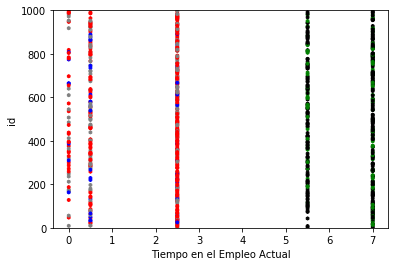

In [70]:
labels = kmeans.labels_
fcs =  pd.DataFrame()
fcs['label'] = labels
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['Color']= ['Azul','Gris','Rojo','negro','verde','amarillo','magenta','cyan'] #Nombrando a los grupos
cantidadGrupo['Cantidad']=fcs.groupby('label').size()
#cantidadGrupo

#Visualización de los clusters
C = kmeans.cluster_centers_
colores=['blue','grey','red','black','green','yellow','magenta','cyan' ]
asignar=[]
for row in labels:
    asignar.append(colores[row])
f1 = pd.DataFrame(df,columns=['row_id'])
f2 = pd.DataFrame(df2,columns=['tiempo de empleo'])
df['color']=asignar
plt.scatter( f2,f1, marker='h', c=asignar, s=10)
#plt.scatter(C[:, 1], C[:, 0], marker='*', c=colores, s=1000)# no se notan mucho de todos modos.
plt.ylim(0, 1000)
plt.xlabel('Tiempo en el Empleo Actual')
plt.ylabel('id')
plt.show()

In [34]:
df2['Clasificación'].groupby(df['color']).describe() #Buenos o malos?

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
black,291.0,10.0,0.0,10.0,10.0,10.0,10.0,10.0
blue,54.0,10.0,0.0,10.0,10.0,10.0,10.0,10.0
green,92.0,-10.0,0.0,-10.0,-10.0,-10.0,-10.0,-10.0
grey,176.0,-10.0,0.0,-10.0,-10.0,-10.0,-10.0,-10.0
red,287.0,10.0,0.0,10.0,10.0,10.0,10.0,10.0


In [29]:
#de lo anterior tenemos que los clientes gren y grey son los peores
#¿cual es mejor que cual?

In [35]:
df2['Responsabilidades'].groupby(df['color']).describe() #tiempo trabajando

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
black,291.0,0.020607,0.374852,-0.147778,-0.147778,-0.147778,-0.147778,0.852222
blue,54.0,-0.073704,0.264351,-0.147778,-0.147778,-0.147778,-0.147778,0.852222
green,92.0,0.080483,0.422011,-0.147778,-0.147778,-0.147778,-0.147778,0.852222
grey,176.0,-0.062551,0.280016,-0.147778,-0.147778,-0.147778,-0.147778,0.852222
red,287.0,0.005532,0.360915,-0.147778,-0.147778,-0.147778,-0.147778,0.852222


In [36]:
df['row_id'].groupby(df['color']).describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
black,291.0,497.323024,289.107686,0.0,240.00,498.0,752.50,997.0
blue,54.0,471.259259,300.546997,25.0,211.00,550.5,732.50,982.0
green,92.0,511.500000,279.462416,13.0,259.25,559.5,756.00,980.0
grey,176.0,527.028409,283.318003,1.0,301.75,544.0,762.25,998.0
red,287.0,493.139373,291.912541,7.0,256.50,460.0,735.00,999.0


In [32]:
df.describe()

,row_id,1,2,4,5,6,7,9,10,11,12,13,15,16,17,20
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.00000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,501.680000,21.093333,1.320000,3276.157778,5.342778,3.662778,1.312222,2.80000,0.223333,1.253333,35.567778,2.451756,3.054444,0.694444,7.044444,4.044444
std,288.359963,12.082133,4.050197,2777.158770,6.564382,2.530218,6.658963,3.04289,7.184840,6.702335,11.398967,1.136719,9.395306,5.449635,7.101538,9.150711
min,-10.000000,4.000000,-10.000000,250.000000,-10.000000,0.000000,-10.000000,-10.00000,-10.000000,-10.000000,19.000000,0.090000,-10.000000,-10.000000,-10.000000,-10.000000
25%,253.750000,12.000000,0.000000,1382.000000,0.100000,2.500000,3.000000,3.00000,-10.000000,3.000000,27.000000,3.000000,-10.000000,3.000000,10.000000,-10.000000
50%,504.500000,18.000000,3.900000,2328.000000,10.000000,2.500000,4.000000,3.00000,4.000000,3.000000,33.000000,3.000000,10.000000,3.000000,10.000000,10.000000
75%,750.500000,24.000000,3.900000,3994.000000,10.000000,7.000000,4.000000,3.00000,4.000000,4.000000,42.000000,3.000000,10.000000,3.000000,10.000000,10.000000
max,999.000000,72.000000,4.000000,18424.000000,10.000000,7.000000,10.000000,10.00000,10.000000,10.000000,75.000000,3.000000,10.000000,10.000000,10.000000,10.000000


In [37]:
#usuarios mas cercanos a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df2)
closest
indices=df['row_id'].values
for row in closest:
    print(indices[row])

31
958
52
371
589


In [69]:
df3= pd.concat([df[(df['row_id'] == 31)], df[(df['row_id'] == 371)], df[(df['row_id'] == 52)],df[(df['row_id'] == 958)], df[(df['row_id'] == 589)]],axis=0)
df3=df3.drop('row_id',axis=1)
df3=df3.drop('19',axis=1) #hay muchos trabajadores extranjeros
df3=df3.drop('14',axis=1) #No parece ser importante la forma en que viven
df3=df3.drop('8',axis=1)  # Tampoco parece importar el estatus y sexo
df3=df3.drop('17',axis=1)  #No importan las responsabilidades
df3=df3.drop('9',axis=1)   #No importa demasiado si tiene codeudores o avales
df3=df3.drop('5',axis=1)  #aparentemente tampoco importan demasiado los ahorros
df3

,0,1,2,3,4,6,7,10,11,12,13,15,16,18,20,color
793,A11,24,3.9,A42,4020,2.5,2,2,3,27,0.09,1,3,A191,10,blue
22,A14,18,0.0,A43,6070,7.0,3,4,3,33,3.00,2,3,A192,10,black
874,A14,12,3.9,A43,1262,2.5,3,2,3,25,3.00,1,3,A191,10,red
179,A11,28,3.9,A40,4006,2.5,3,2,3,45,3.00,1,2,A191,-10,grey
562,A11,12,0.0,A42,2246,7.0,3,3,2,60,3.00,2,3,A191,-10,green


In [68]:
#Grey   p= 0.0
#Green  p= 0.25
#blue   p= 0.5
#red    p= 0.75
#black  p= 1.0